# Librerías

In [27]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Carga de dataset

In [28]:
data = pd.read_csv("data.csv")
data.head()


,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,NaN,0.00,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,NaN,0.00,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,NaN,1,3100.0,2000.00,11010.65,189,Lima,0,TECNICA


In [29]:
print(data.groupby('mora').size())

mora
0    2484
1    5915
dtype: int64


In [30]:
data.shape

(8399, 14)

# Imputación de datos

In [31]:
import pandas as pd # módulo para tratamiento de datos
import numpy as np # módulo para tratamiento de matrices
import missingno as msno # librería para tratamiento de datos perdidos
import matplotlib.pyplot as plt # módulo graficador

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mora          8399 non-null   int64  
 1   atraso        8399 non-null   int64  
 2   vivienda      8399 non-null   object 
 3   edad          8399 non-null   int64  
 4   dias_lab      8399 non-null   int64  
 5   exp_sf        6569 non-null   float64
 6   nivel_ahorro  8399 non-null   int64  
 7   ingreso       8399 non-null   float64
 8   linea_sf      7272 non-null   float64
 9   deuda_sf      7938 non-null   float64
 10  score         8399 non-null   int64  
 11  zona          8399 non-null   object 
 12  clasif_sbs    8399 non-null   int64  
 13  nivel_educ    8399 non-null   object 
dtypes: float64(4), int64(7), object(3)
memory usage: 918.8+ KB


In [32]:
# Empezamos realizando un análisis descriptivo de las variables para entender sus dimensiones
data.describe()

,mora,atraso,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,clasif_sbs
count,8399.000000,8399.00000,8399.000000,8399.000000,6569.000000,8399.000000,8399.000000,7272.000000,7938.000000,8399.000000,8399.000000
mean,0.704251,4.46315,36.399095,5555.888796,32.401583,10.593166,4350.406997,11987.241038,6110.724308,196.619955,0.563519
std,0.456406,14.27084,9.825764,2153.244140,32.866232,3.374619,5367.058953,21322.801655,11177.989799,19.544348,0.905637
min,0.000000,0.00000,20.000000,2956.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.000000
25%,0.000000,0.00000,29.000000,4174.000000,7.000000,12.000000,1366.670000,1169.372500,478.320000,182.000000,0.000000
50%,1.000000,0.00000,34.000000,4904.000000,20.000000,12.000000,2400.000000,4030.120000,2258.755000,197.000000,0.000000
75%,1.000000,2.00000,42.000000,6182.000000,51.000000,12.000000,4900.000000,12086.627500,5755.150000,212.000000,1.000000
max,1.000000,245.00000,85.000000,20700.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,4.000000


In [33]:

# explorando la cantidad de valores perdidos en las variables
data.isna().sum()/data.shape[0]*100

mora             0.000000
atraso           0.000000
vivienda         0.000000
edad             0.000000
dias_lab         0.000000
exp_sf          21.788308
nivel_ahorro     0.000000
ingreso          0.000000
linea_sf        13.418264
deuda_sf         5.488749
score            0.000000
zona             0.000000
clasif_sbs       0.000000
nivel_educ       0.000000
dtype: float64

In [34]:
print(data.groupby('exp_sf').size())

exp_sf
0.0      1258
1.0        28
2.0        22
3.0        33
4.0        31
         ... 
121.0      12
122.0       1
123.0       3
124.0       2
130.0       1
Length: 126, dtype: int64


In [35]:
print(data.groupby('linea_sf').size())

linea_sf
0.00         747
0.02           2
0.06           1
0.09           2
0.26           1
            ... 
119402.50      1
120610.00      1
121200.00      1
121335.08      1
121543.40     87
Length: 3240, dtype: int64


In [36]:
print(data.groupby('deuda_sf').size())

deuda_sf
0.00        1185
0.05           5
0.06           1
0.09           2
0.22           1
            ... 
55402.85       1
55665.36       1
56227.48       1
56989.35       1
57094.38     195
Length: 3851, dtype: int64


Un vistazo inicial nos muestra que existen variables con mucha información faltante como son las variables: exp_sf, linea_sf y deuda_sf. 

**bar missing:** visualizar los datos de los valores perdidos es mediante el uso de gráficos de barras. Estas barras muestran los valores que son proporcionales a los datos que no faltan en el conjunto de datos. Junto con eso, también se muestra el número de valores que faltan.



<AxesSubplot:>

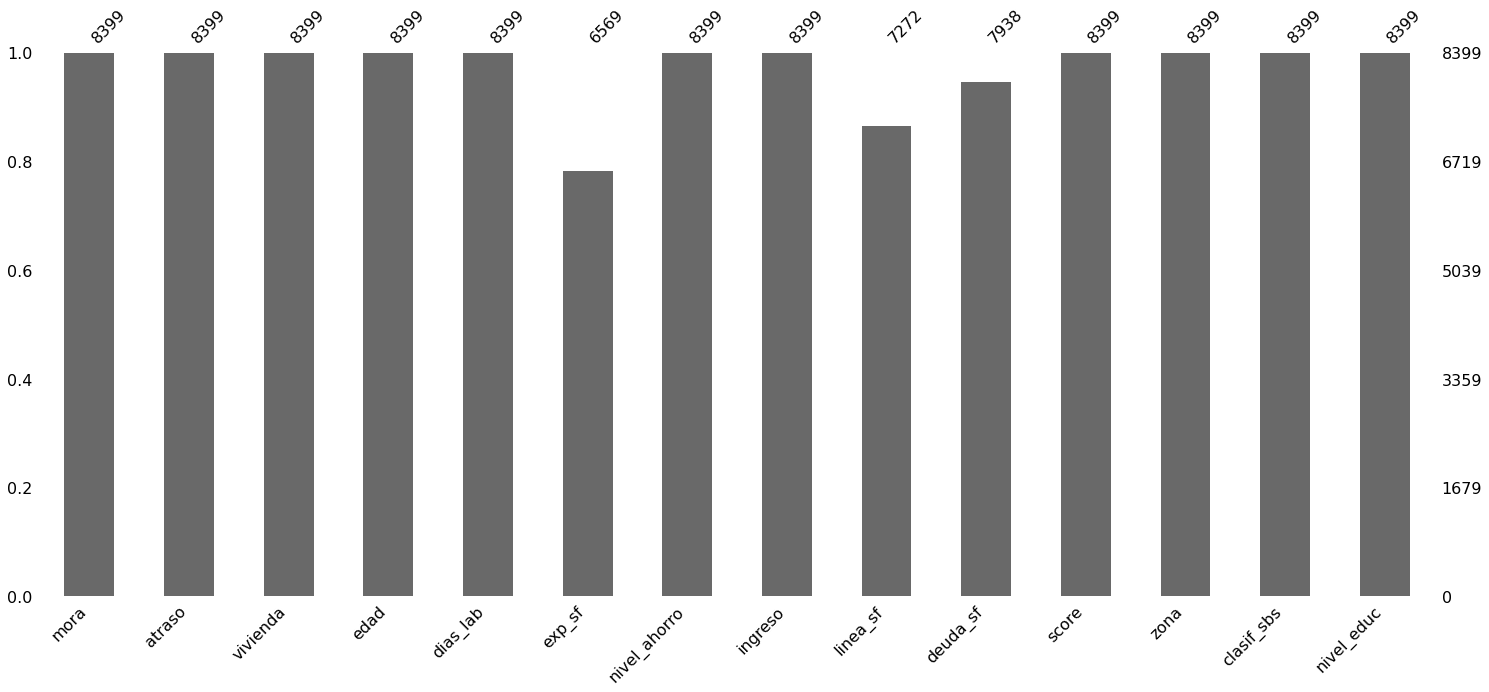

In [37]:
# bar missing
msno.bar(data)

In [38]:
#Imputación

data['exp_sf'].replace(np.nan, '3.0', inplace = True)
data['linea_sf'].replace(np.nan, '121543.40', inplace = True)
data['deuda_sf'].replace(np.nan, '0.5', inplace = True)

data.head()



,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,FAMILIAR,30,3748,93.0,5,3500.0,121543.40,0.0,214,Lima,4,UNIVERSITARIA
1,0,18,FAMILIAR,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,TECNICA
2,0,0,FAMILIAR,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,UNIVERSITARIA
3,0,0,FAMILIAR,36,5179,20.0,12,2700.0,121543.40,0.0,187,Ancash,0,TECNICA
4,0,0,FAMILIAR,46,3960,3.0,1,3100.0,2000.0,11010.65,189,Lima,0,TECNICA


In [39]:
# explorando la cantidad de valores perdidos en las variables
data.isna().sum()/data.shape[0]*100

mora            0.0
atraso          0.0
vivienda        0.0
edad            0.0
dias_lab        0.0
exp_sf          0.0
nivel_ahorro    0.0
ingreso         0.0
linea_sf        0.0
deuda_sf        0.0
score           0.0
zona            0.0
clasif_sbs      0.0
nivel_educ      0.0
dtype: float64

## Transformación de datos a numéricos

In [40]:
print(data.groupby('vivienda').size())

vivienda
ALQUILADA     165
FAMILIAR     5853
PROPIA       2381
dtype: int64


In [42]:
print(data.groupby('nivel_educ').size())

nivel_educ
SECUNDARIA        267
SIN EDUCACION      42
TECNICA          3288
UNIVERSITARIA    4802
dtype: int64


In [45]:
#Cambiar los valores de cadena a numéricos
d1 = {'ALQUILADA': 0, 'FAMILIAR': 1, 'PROPIA': 2}
data['vivienda'] = data['vivienda'].map(d1)
#Impresión de datos modificados

In [47]:
d2 = {'SECUNDARIA': 0, 'SIN EDUCACION': 1,'TECNICA':2, 'UNIVERSITARIA':3}
data['nivel_educ'] = data['nivel_educ'].map(d2)

In [57]:
data.head()

,mora,atraso,vivienda,edad,dias_lab,exp_sf,nivel_ahorro,ingreso,linea_sf,deuda_sf,score,zona,clasif_sbs,nivel_educ
0,0,235,1,30,3748,93.0,5,3500.0,121543.40,0.0,214,Lima,4,3
1,0,18,1,32,4598,9.0,12,900.0,1824.67,1933.75,175,La Libertad,1,2
2,0,0,1,26,5148,8.0,2,2400.0,2797.38,188.29,187,Lima,0,3
3,0,0,1,36,5179,20.0,12,2700.0,121543.40,0.0,187,Ancash,0,2
4,0,0,1,46,3960,3.0,1,3100.0,2000.0,11010.65,189,Lima,0,2


## Variable X y Y

In [59]:
feature_cols = ['score', 'nivel_ahorro', 'atraso', 'clasif_sbs','dias_lab','edad','vivienda','exp_sf','ingreso','linea_sf','deuda_sf','nivel_educ']
X = data[feature_cols] # features
y = np.array(data['mora'])
X.shape

(8399, 12)

## Normalización

In [60]:
# el escalador - para la normalización media
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split


In [61]:
# Vamos a separar los datos en un conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((5879, 12), (2520, 12))

In [63]:
'''
    Normalización media con pandas
'''
means = X_train.mean(axis=0)
means

<ipython-input-63-472b08b4af87>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = X_train.mean(axis=0)


score            196.962579
nivel_ahorro      10.603164
atraso             4.571186
clasif_sbs         0.565913
dias_lab        5573.631060
edad              36.478993
vivienda           1.262800
ingreso         4412.362305
nivel_educ         2.509100
dtype: float64

In [64]:
# aprendamos ahora los valores mínimos y máximos, y el rango de valores 
# del conjunto de train

ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

<ipython-input-64-b6b90b64269d>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ranges = X_train.max(axis=0)-X_train.min(axis=0)


score             132.0
nivel_ahorro       12.0
atraso            245.0
clasif_sbs          4.0
dias_lab        17744.0
edad               65.0
vivienda            2.0
ingreso         29876.3
nivel_educ          3.0
dtype: float64

In [65]:
# ahora estamos listos para realizar la normalización media:

X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

In [67]:
# echemos un vistazo al conjunto de datos de entrenamiento original: valores medios y mínimos, máximos
# Uso np.round para reducir el número de decimales a 1.

np.round(X_train.describe(), 1)

,score,nivel_ahorro,atraso,clasif_sbs,dias_lab,edad,vivienda,ingreso,nivel_educ
count,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0
mean,197.0,10.6,4.6,0.6,5573.6,36.5,1.3,4412.4,2.5
std,19.5,3.4,15.3,0.9,2160.3,9.9,0.5,5452.0,0.7
min,134.0,0.0,0.0,0.0,2956.0,20.0,0.0,123.7,0.0
25%,182.0,12.0,0.0,0.0,4174.0,29.0,1.0,1370.8,2.0
50%,197.0,12.0,0.0,0.0,4935.0,34.0,1.0,2422.6,3.0
75%,212.0,12.0,2.0,1.0,6274.0,42.0,2.0,5000.0,3.0
max,266.0,12.0,245.0,4.0,20700.0,85.0,2.0,30000.0,3.0


In [68]:
# echemos un vistazo al conjunto de datos de entrenamiento a escala: valores medios y mínimos, máximos
# Uso np.round para reducir el número de decimales a 1.

np.round(X_train_scaled.describe(), 1)

,atraso,clasif_sbs,dias_lab,edad,ingreso,nivel_ahorro,nivel_educ,score,vivienda
count,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0,5879.0
mean,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0
std,0.1,0.2,0.1,0.2,0.2,0.3,0.2,0.1,0.2
min,-0.0,-0.1,-0.1,-0.3,-0.1,-0.9,-0.8,-0.5,-0.6
25%,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,-0.2,-0.1,-0.1
50%,-0.0,-0.1,-0.0,-0.0,-0.1,0.1,0.2,0.0,-0.1
75%,-0.0,0.1,0.0,0.1,0.0,0.1,0.2,0.1,0.4
max,1.0,0.9,0.9,0.7,0.9,0.1,0.2,0.5,0.4


Como era de esperar, la media de cada variable, que no estaba centrada en cero, ahora está alrededor de cero y los valores mínimo y máximo varían aproximadamente entre -1 y 1. Tenga en cuenta, sin embargo, que las desviaciones estándar varían según la dispersión de la variable. comenzar y está muy influenciado por la presencia de valores atípicos.

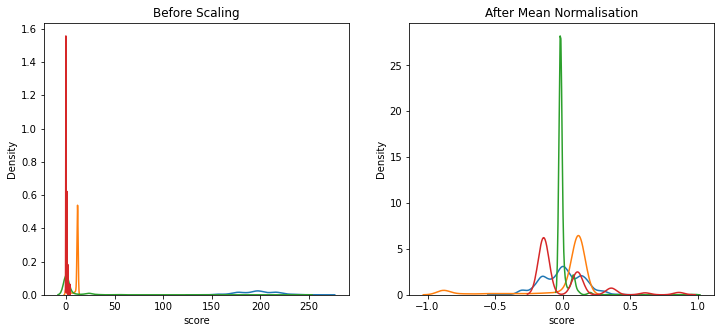

In [69]:
#Librería
import seaborn as sns

# comparemos las distribuciones de variables antes y después de escalar

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['score'], ax=ax1)
sns.kdeplot(X_train['nivel_ahorro'], ax=ax1)
sns.kdeplot(X_train['atraso'], ax=ax1)
sns.kdeplot(X_train['clasif_sbs'], ax=ax1)


# after scaling
ax2.set_title('After Mean Normalisation')
sns.kdeplot(X_train_scaled['score'], ax=ax2)
sns.kdeplot(X_train_scaled['nivel_ahorro'], ax=ax2)
sns.kdeplot(X_train_scaled['atraso'], ax=ax2)
sns.kdeplot(X_train_scaled['clasif_sbs'], ax=ax2)
plt.show()



## Entrenar un modelo de clasificador de bosque aleatorio

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=7, n_estimators=100)
RF.fit(X_train, y_train)
y_pred_RF= RF.predict(X_test)

df = pd.DataFrame()

cols = ['Machine Learning Classification Method',
        'Train Accuracy', 
        'Test Accuracy', 
        "Top 1 Feature Predictor",
        "Top 2 Feature Predictor",
        "Top 3 Feature Predictor",
        "Top 4 Feature Predictor",
        "Top 5 Feature Predictor"]

df.loc['Machine Learning Classification Method', 
       'Details'] = 'Random Forest Classifier'
df.loc['Train Accuracy', 'Details'] = RF.score(X_train, y_train) 
df.loc['Test Accuracy', 'Details'] = RF.score(X_test, y_test)

feature_importances = X.columns[np.argsort(RF.feature_importances_)][-5:]
df.loc['Top 1 Feature Predictor', 'Details'] = feature_importances[4]
df.loc['Top 2 Feature Predictor', 'Details'] = feature_importances[3]
df.loc['Top 3 Feature Predictor', 'Details'] = feature_importances[2]
df.loc['Top 4 Feature Predictor', 'Details'] = feature_importances[1]
df.loc['Top 5 Feature Predictor', 'Details'] = feature_importances[0]

display(df)

,Details
Machine Learning Classification Method,Random Forest Classifier
Train Accuracy,0.787889
Test Accuracy,0.755952
Top 1 Feature Predictor,exp_sf
Top 2 Feature Predictor,ingreso
Top 3 Feature Predictor,score
Top 4 Feature Predictor,dias_lab
Top 5 Feature Predictor,nivel_ahorro
